<a href="https://colab.research.google.com/github/sushmit86/Data_science_experiments/blob/master/Statistical_Rethinking/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

### Code 2.1

In [0]:
ways = np.array([0,3,8,9,0])
print(ways/np.sum(ways))

[0.   0.15 0.4  0.45 0.  ]


### Code 2.2

$Pr(w|n,p) = \frac{n!}{w!(n-w)!}p^w(1-p)^w $
```
Count of water w is distributed binomially
```

In [0]:
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000006

### Code 2.3

In [0]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    #prior = np.repeat(1, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

Text(0, 0.5, 'Poterior Probability')

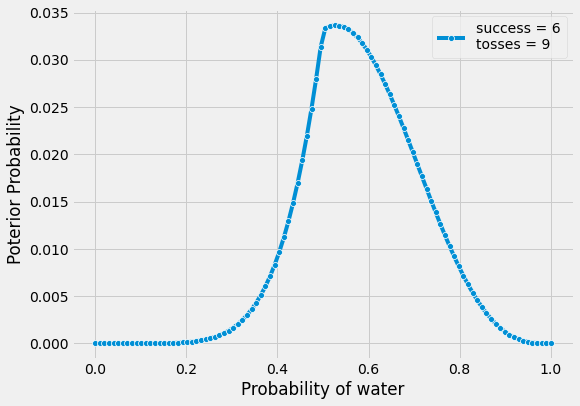

In [0]:
points = 100
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)

fig, axs = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(p_grid,posterior,ax=axs,label='success = {}\ntosses = {}'.format(w, n),marker="o")
axs.set_xlabel('Probability of water') 
axs.set_ylabel('Posterior Probability')

### Section2.6 (Quadratic approximation)

In [0]:
data = np.repeat((0, 1), (12, 24))
with pm.Model() as normal_approximation:
  p = pm.Uniform('p',0,1)
  w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
  mean_q = pm.find_MAP()
  std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
  print(mean_q['p'],std_q)
    

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -4.0055, ||grad|| = 6: 100%|██████████| 7/7 [00:00<00:00, 1115.00it/s]


0.6666666671652423 [0.07856742]


In [0]:
norm = stats.norm(mean_q['p'],std_q)
prob = 0.89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
ci = mean_q['p'] + std_q * z 
ci

array([0.54110076, 0.79223258])

### Beta Binomial conjugacy

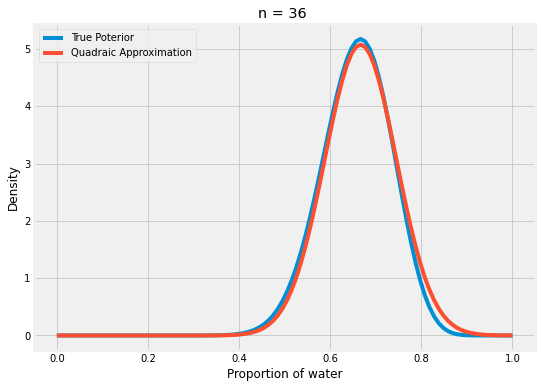

In [0]:
w,n = 24,36
x = np.linspace(0,1,100)
fig, axs = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(x,stats.beta.pdf(x,w+1,n-w+1),label
             = 'True Poterior',ax=axs)
sns.lineplot(x,norm.pdf(x),label
             = 'Quadraic Approximation',ax=axs)

axs.set_xlabel('Proportion of water') 
axs.set_ylabel('Density')
axs.set_title('n = {n} '.format(n=n))

fig.show()
